In [32]:
from scLENS2 import scLENS2
import pandas as pd
import cupy
import scanpy as sc

In [33]:
df = pd.read_csv('./Z8eq.csv')
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# 세포 정보 추출 (cell 열)
obs = pd.DataFrame(df['cell']) 

# 유전자 발현 데이터 추출 (두 번째 열부터)
X = df.iloc[:, 1:].values 

# 유전자 메타데이터 생성 (열 이름 사용)
var = pd.DataFrame(df.columns[1:])
var.columns = ['gene'] 

# AnnData 객체 생성
adata = sc.AnnData(X, obs=obs, var=var)

adata

/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'

In [35]:
adata.raw = adata.copy()
adata.raw = sc.AnnData(adata.X.copy(), obs=adata.obs.copy(), var=adata.var.copy())
adata.raw.shape

(3994, 15716)

In [36]:
sclens = scLENS2.scLENS2()

Removed 0 cells and 6065 genes in QC


/home/khyeonmin/projects/ibs/scLENS-py-test/scLENS2/scLENS2.py:160: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  data.uns['preprocess_mean_plot'] = fig1


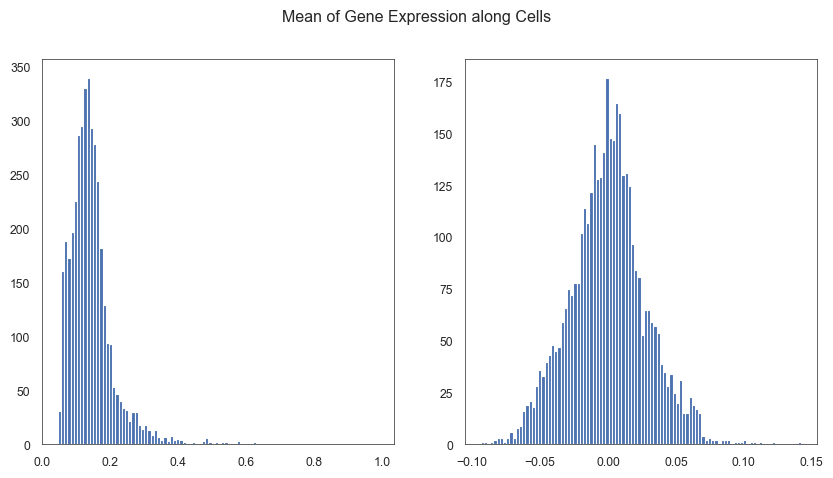

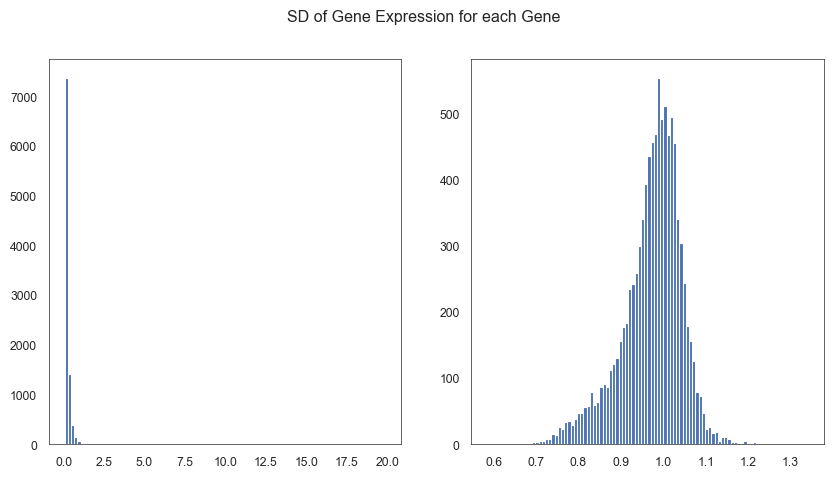

In [37]:
_, adata = sclens.preprocess(adata, plot = True)

In [38]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot'

Max interactions exceeded!
Number of signal components: 16
L_mp type: <class 'cupy.ndarray'>
L_mp shape: (3975,)


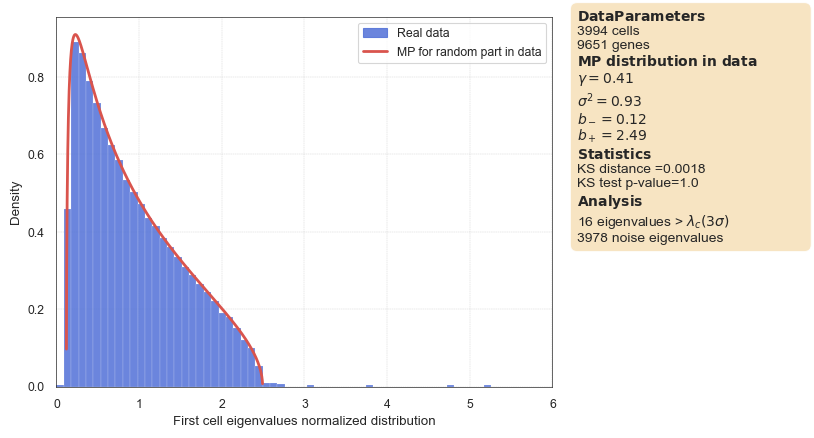

sparsity_th: 0.060129261306547666
Min(corr): 0.09428059558389836, sparsity: 0.999, add_ilen: (38546,)
Min(corr): 0.07737636965244474, sparsity: 0.998, add_ilen: (77092,)
Min(corr): 0.07056494771573739, sparsity: 0.997, add_ilen: (115638,)
Min(corr): 0.06415612886457013, sparsity: 0.996, add_ilen: (154184,)
Min(corr): 0.06405131319172622, sparsity: 0.995, add_ilen: (192730,)
Min(corr): 0.06064551658312989, sparsity: 0.994, add_ilen: (231276,)
Min(corr): 0.058796924061844, sparsity: 0.993, add_ilen: (269822,)
Min(corr): 0.0575131970743652, sparsity: 0.992, add_ilen: (308368,)
Min(corr): 0.05788638149944065, sparsity: 0.991, add_ilen: (346914,)
Min(corr): 0.05450521656761817, sparsity: 0.99, add_ilen: (385460,)
Min(corr): 0.05398579513410934, sparsity: 0.989, add_ilen: (424007,)


100%|██████████| 20/20 [00:58<00:00,  2.92s/it]

CPU Memory Usage: 8391.91 MB
(1319.15673828125, 3725.88916015625)


In [39]:
X_transform = sclens.fit_transform(plot_mp=True)

In [40]:
X_transform

array([[-0.03826169, -0.02644869,  0.04044216, ..., -0.14582109,
         0.06994112, -0.02711196],
       [-0.00069116, -0.02015234,  0.02560884, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00759813, -0.02913346, -0.01168169, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [ 0.00800009,  0.00269003,  0.00197925, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [-0.01079739,  0.00910996, -0.0051903 , ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.03640545,  0.01290544, -0.02773451, ...,  0.03067032,
        -0.01833608, -0.08521219]])

In [41]:
X_transform.shape

(3994, 9)

In [42]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot'
    obsm: 'PCA_scLENS'

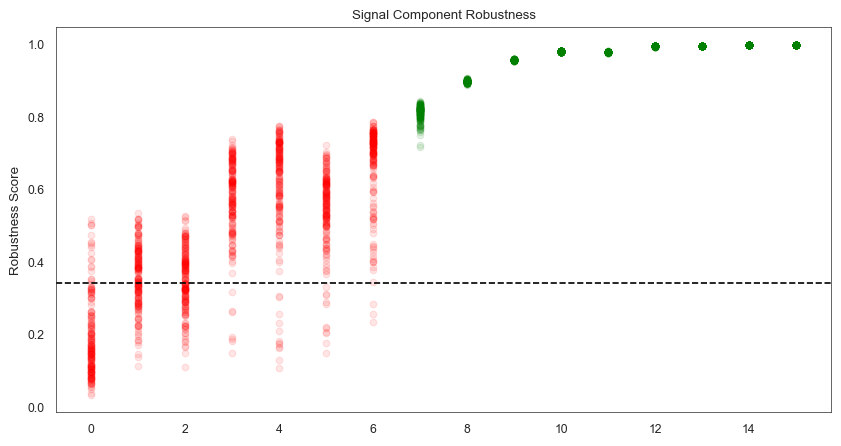

In [43]:
sclens.plot_robust_score()

In [44]:
sclens._signal_components.shape

(3994, 16)

In [45]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot'
    obsm: 'PCA_scLENS'

In [46]:
adata.obsm['PCA_scLENS']

array([[-0.03826169, -0.02644869,  0.04044216, ..., -0.14582109,
         0.06994112, -0.02711196],
       [-0.00069116, -0.02015234,  0.02560884, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00759813, -0.02913346, -0.01168169, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [ 0.00800009,  0.00269003,  0.00197925, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [-0.01079739,  0.00910996, -0.0051903 , ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.03640545,  0.01290544, -0.02773451, ...,  0.03067032,
        -0.01833608, -0.08521219]])

# clustering

In [47]:
# import sys
# from pathlib import Path

# # 프로젝트의 최상위 경로를 Python 경로에 추가
# project_path = Path("/home/khyeonmin/projects/ibs/scLENS-py-test")
# if str(project_path) not in sys.path:
#     sys.path.append(str(project_path))

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import datashader as ds
import bokeh
import holoviews as hv
from skimage import data
import colorcet
import umap
import umap.plot

In [49]:
# umap은 기본적으로 numpy 배열 사용 필요!!
X_transform_np = X_transform.get()

print(type(X_transform_np))
mapper = umap.UMAP(metric='cosine').fit(X_transform_np)

<class 'numpy.ndarray'>


/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [50]:
from scLENS2.clustering import find_clusters, chooseR

In [51]:
print(X_transform_np)

[[-0.03826169 -0.02644869  0.04044216 ... -0.14582109  0.06994112
  -0.02711196]
 [-0.00069116 -0.02015234  0.02560884 ... -0.13098915  0.07156501
  -0.03700359]
 [ 0.00759813 -0.02913346 -0.01168169 ... -0.13624159  0.05192215
  -0.0357052 ]
 ...
 [ 0.00800009  0.00269003  0.00197925 ...  0.02358551 -0.06861508
   0.0384025 ]
 [-0.01079739  0.00910996 -0.0051903  ...  0.02328334 -0.00856293
  -0.05428069]
 [ 0.03640545  0.01290544 -0.02773451 ...  0.03067032 -0.01833608
  -0.08521219]]


In [52]:
# res, stats = chooseR(X_transform_np, reps=5, n_jobs=-1)
# if isinstance(res, (tuple, list)):
#     res = res[0]

In [53]:
resolution = chooseR(X_transform_np, reps=5, n_jobs=-1) 
print(resolution)

ChooseR:   0%|          | 0/39 [00:00<?, ?it/s]

stats_row :  [np.float64(0.15000000000000002)]
cls :  [4. 4. 4. ... 1. 1. 1.]
clusters: [array([-1.,  4.,  4., ..., -1., -1.,  1.]), array([ 4.,  4.,  4., ...,  1.,  1., -1.]), array([ 4.,  4., -1., ..., -1.,  1., -1.]), array([ 4.,  4.,  4., ..., -1.,  1., -1.]), array([4., 4., 4., ..., 1., 1., 1.])]
GPU is not available, function will be run in CPU


ChooseR:   3%|▎         | 1/39 [00:13<08:42, 13.75s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
sil :  [0.9980237  1.         0.9980237  ... 0.96797645 0.9983209  0.9596734 ]
sil_grp :  [np.float32(0.992248), np.float32(0.9879028), np.float32(0.9956556), np.float32(0.9949482), np.float32(0.9795487), np.float32(0.96138465)]
stats_row :  [np.float64(0.2)]
cls :  [5. 5. 5. ... 4. 1. 1.]
clusters: [array([5., 5., 5., ..., 4., 1., 1.]), array([ 5., -1.,  5., ...,  4.,  1.,  1.]), array([ 5., -1.,  5., ..., -1.,  1., -1.]), array([ 5., -1.,  5., ...,  4.,  1.,  1.]), array([4., 4., 4., ..., 1., 1., 1.])]
GPU is not available, function will be run in CPU


ChooseR:   5%|▌         | 2/39 [00:20<06:00,  9.73s/it]

score :  [[0.   0.   0.   ... 1.   1.   1.  ]
 [0.   0.   0.   ... 1.   1.   1.  ]
 [0.   0.   0.   ... 1.   1.   1.  ]
 ...
 [1.   1.   1.   ... 0.   0.75 0.75]
 [1.   1.   1.   ... 0.75 0.   0.  ]
 [1.   1.   1.   ... 0.75 0.   0.  ]]
sil :  [0.99960476 0.9594862  0.99960476 ... 0.9918564  0.9780081  0.982315  ]
sil_grp :  [np.float32(0.9289465), np.float32(0.98875827), np.float32(0.9957528), np.float32(0.97433025), np.float32(0.9922133), np.float32(0.9526768), np.float32(0.9709587)]
stats_row :  [np.float64(0.25)]
cls :  [5. 5. 5. ... 4. 1. 1.]
clusters: [array([ 6.,  6., -1., ...,  4., -1.,  1.]), array([-1.,  5.,  5., ..., -1.,  1., -1.]), array([ 5.,  5.,  5., ...,  4., -1.,  1.]), array([-1.,  6.,  6., ..., -1.,  1., -1.]), array([ 5., -1.,  5., ...,  2.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:   8%|▊         | 3/39 [00:27<05:00,  8.36s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.9920949  0.9940711  0.9980237  ... 0.98184663 0.9321689  0.9398904 ]
sil_grp :  [np.float32(0.8323469), np.float32(0.99353117), np.float32(0.9932089), np.float32(0.96358716), np.float32(0.9920637), np.float32(0.96508425), np.float32(0.980742)]
stats_row :  [np.float64(0.3)]
cls :  [5. 5. 5. ... 4. 1. 1.]
clusters: [array([ 5.,  5.,  5., ...,  4., -1., -1.]), array([ 6.,  6.,  6., ..., -1.,  1.,  1.]), array([ 6.,  6.,  6., ...,  4.,  1., -1.]), array([5., 5., 5., ..., 3., 1., 1.]), array([ 5.,  5.,  5., ...,  4.,  1., -1.])]
GPU is not available, function will be run in CPU


ChooseR:  10%|█         | 4/39 [00:33<04:28,  7.66s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.99950594 0.99950594 0.99950594 ... 0.979665   0.98497266 0.9397496 ]
sil_grp :  [np.float32(0.9577186), np.float32(0.99123615), np.float32(0.9768582), np.float32(0.94519067), np.float32(0.9930865), np.float32(0.90893584), np.float32(0.97532254)]
stats_row :  [np.float64(0.35000000000000003)]
cls :  [5. 5. 5. ... 3. 1. 1.]
clusters: [array([6., 6., 6., ..., 4., 1., 1.]), array([6., 6., 6., ..., 2., 1., 1.]), array([ 5.,  5., -1., ...,  4.,  1.,  1.]), array([-1.,  5.,  5., ...,  4.,  1.,  1.]), array([ 5.,  5.,  5., ...,  3., -1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  13%|█▎        | 5/39 [00:40<04:07,  7.29s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.9986825  0.9990119  0.9986825  ... 0.98226273 0.9726372  0.9759172 ]
sil_grp :  [np.float32(0.9328548), np.float32(0.9932639), np.float32(0.9445362), np.float32(0.9819906), np.float32(0.99201536), np.float32(0.9870587), np.float32(0.97444767), np.float32(-0.21960394)]
stats_row :  [np.float64(0.4)]
cls :  [5. 5. 5. ... 3. 1. 1.]
clusters: [array([-1.,  6.,  6., ...,  3.,  1., -1.]), array([-1., -1.,  6., ...,  4., -1.,  1.]), array([5., 5., 5., ..., 4., 1., 1.]), array([ 6.,  6.,  6., ...,  4., -1., -1.]), array([ 6.,  6.,  6., ..., -1.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  15%|█▌        | 6/39 [00:47<03:54,  7.10s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.94268775 0.96014494 0.93807644 ... 0.9334305  0.9867149  0.9912934 ]
sil_grp :  [np.float32(0.97928464), np.float32(0.9923898), np.float32(0.7882931), np.float32(0.98442936), np.float32(0.8929754), np.float32(0.9823565), np.float32(0.97033226), np.float32(0.12656944)]
stats_row :  [np.float64(0.45)]
cls :  [6. 6. 6. ... 3. 1. 1.]
clusters: [array([-1.,  7.,  7., ...,  4.,  1.,  1.]), array([5., 5., 5., ..., 4., 1., 1.]), array([6., 6., 6., ..., 4., 1., 1.]), array([ 6.,  6.,  6., ..., -1.,  1.,  1.]), array([ 6.,  6.,  6., ..., -1.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  18%|█▊        | 7/39 [00:53<03:41,  6.93s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [1.         0.99881655 0.99881655 ... 0.97055185 0.993937   0.993937  ]
sil_grp :  [np.float32(0.9784611), np.float32(0.9903776), np.float32(0.9169599), np.float32(0.9897143), np.float32(0.98449695), np.float32(0.9921696), np.float32(0.9760806), np.float32(0.9573773), np.float32(0.12516074)]
stats_row :  [np.float64(0.5)]
cls :  [6. 6. 6. ... 3. 1. 1.]
clusters: [array([6., 6., 6., ..., 2., 1., 1.]), array([ 6., -1.,  6., ...,  3.,  1.,  1.]), array([ 5.,  5., -1., ..., -1.,  1.,  1.]), array([6., 6., 6., ..., 3., 1., 1.]), array([6., 6., 6., ..., 4., 1., 1.])]
GPU is not available, function will be run in CPU


ChooseR:  21%|██        | 8/39 [01:00<03:33,  6.89s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.9975881  0.9937645  0.99497396 ... 0.98833716 0.9638102  0.9638102 ]
sil_grp :  [np.float32(0.9002651), np.float32(0.992972), np.float32(0.9598693), np.float32(0.9857401), np.float32(0.9828244), np.float32(0.9851194), np.float32(0.98127484), np.float32(0.92148465), np.float32(0.6803011)]
stats_row :  [np.float64(0.6000000000000001)]
cls :  [6. 6. 6. ... 3. 1. 1.]
clusters: [array([-1.,  6.,  6., ...,  8.,  1., -1.]), array([5., 5., 5., ..., 8., 1., 1.]), array([6., 6., 6., ..., 4., 1., 1.]), array([ 4.,  4.,  4., ..., -1.,  1.,  1.]), array([-1., -1.,  6., ..., -1., -1., -1.])]
GPU is not available, function will be run in CPU


ChooseR:  23%|██▎       | 9/39 [01:04<02:53,  5.79s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.995071   0.9969424  0.9993962  ... 0.51668286 0.9731761  0.9629026 ]
sil_grp :  [np.float32(0.93383336), np.float32(0.9927678), np.float32(0.67516243), np.float32(0.989103), np.float32(0.83894247), np.float32(0.99221057), np.float32(0.9796728), np.float32(0.9260576), np.float32(0.12816152)]
stats_row :  [np.float64(0.7500000000000001)]
cls :  [5. 5. 5. ... 9. 3. 7.]
clusters: [array([ 5., -1.,  5., ...,  8.,  1., -1.]), array([ 5., -1.,  5., ...,  8.,  1.,  1.]), array([ 6.,  6., -1., ...,  4.,  1., -1.]), array([ 6.,  6.,  6., ...,  3.,  1., -1.]), array([ 5.,  5.,  5., ..., -1.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  26%|██▌       | 10/39 [01:07<02:28,  5.14s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [ 0.99498457  0.9811765   0.9960511  ...  0.5143194  -0.8936143
  0.07687788]
sil_grp :  [np.float32(0.99334264), np.float32(0.9910156), np.float32(-0.657595), np.float32(0.9762811), np.float32(0.9821383), np.float32(0.97108376), np.float32(0.7185367), np.float32(0.8912246), np.float32(0.24423435), np.float32(0.90299094), np.float32(0.84459347)]
stats_row :  [np.float64(1.0)]
cls :  [ 4.  4.  4. ... 10.  2.  6.]
clusters: [array([ 4.,  4., -1., ...,  9.,  2.,  6.]), array([-1.,  4.,  4., ...,  9., 10., -1.]), array([ 4.,  4.,  4., ..., 10., -1.,  6.]), array([ 5.,  5., -1., ...,  9.,  6.,  3.]), array([ 5., -1.,  5., ...,  9.,  3.,  7.])]
GPU is not available, function will be run in CPU


ChooseR:  28%|██▊       | 11/39 [01:12<02:21,  5.05s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9988235  0.9986274  0.99764705 ... 0.9410995  0.6426507  0.8143631 ]
sil_grp :  [np.float32(0.8387149), np.float32(0.65728974), np.float32(0.96077967), np.float32(0.99443907), np.float32(0.9740798), np.float32(0.75409454), np.float32(0.8744316), np.float32(0.9590084), np.float32(0.54531896), np.float32(0.8830998), np.float32(0.95635796), np.float32(0.81054115), np.float32(0.29617685)]
stats_row :  [np.float64(1.2500000000000002)]
cls :  [ 4.  4.  4. ... 10.  2.  6.]
clusters: [array([-1.,  3.,  3., ..., 10.,  2.,  6.]), array([ 3., -1., -1., ..., 11., 12.,  2.]), array([ 6.,  6.,  6., ..., 10., 11.,  4.]), array([ 2.,  2.,  2., ..., 12., 11.,  5.]), array([ 3., -1.,  3., ..., 10., 11.,  5.])]
GPU is not available, function will be run in CPU


ChooseR:  31%|███       | 12/39 [01:16<02:08,  4.76s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.94411767 0.9121569  0.9415686  ... 0.80936265 0.49325836 0.7909068 ]
sil_grp :  [np.float32(0.55703056), np.float32(0.4600233), np.float32(0.9920206), np.float32(0.918402), np.float32(0.9625807), np.float32(0.7246739), np.float32(0.7718563), np.float32(0.9216603), np.float32(0.94178855), np.float32(0.5368652), np.float32(0.9910194), np.float32(0.8185255), np.float32(0.54538447)]
stats_row :  [np.float64(1.5000000000000002)]
cls :  [ 1.  1.  1. ... 13. 11.  3.]
clusters: [array([ 2.,  2., -1., ..., 11.,  5.,  8.]), array([ 6.,  6.,  6., ..., 11.,  5., -1.]), array([ 3.,  3.,  3., ..., -1., -1.,  5.]), array([ 3.,  3.,  3., ..., 10., 11.,  5.]), array([ 1., -1.,  1., ..., -1., -1., -1.])]
GPU is not available, function will be run in CPU


ChooseR:  33%|███▎      | 13/39 [01:21<02:00,  4.62s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9441105  0.92882353 0.9292272  ... 0.9664119  0.887652   0.84131324]
sil_grp :  [np.float32(0.90626633), np.float32(0.9893178), np.float32(0.5801214), np.float32(0.86818564), np.float32(0.95692694), np.float32(0.9359244), np.float32(0.69755375), np.float32(0.9460795), np.float32(0.64493877), np.float32(-0.015532398), np.float32(0.7547017), np.float32(0.38255072), np.float32(0.93037146), np.float32(0.92747015), np.float32(0.57887584)]
stats_row :  [np.float64(1.7500000000000002)]
cls :  [ 1.  1.  1. ... 11. 10.  3.]
clusters: [array([-1.,  1., -1., ..., -1., 11.,  2.]), array([ 1.,  1.,  1., ..., 12., 13.,  9.]), array([ 1., -1.,  1., ..., -1., 11.,  2.]), array([ 2.,  2.,  2., ..., 10., 12., 13.]), array([-1.,  5.,  5., ..., 11., -1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  36%|███▌      | 14/39 [01:25<01:51,  4.46s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9886514  0.93574613 0.9325127  ... 0.9158391  0.8875272  0.743623  ]
sil_grp :  [np.float32(0.89657813), np.float32(0.15987831), np.float32(0.64849263), np.float32(0.9242423), np.float32(0.9357773), np.float32(0.9147381), np.float32(0.8006859), np.float32(0.8503764), np.float32(0.7646056), np.float32(0.69112474), np.float32(0.847698), np.float32(0.6577348), np.float32(0.77089703), np.float32(0.8120856), np.float32(0.8080909), np.float32(0.87405294)]
stats_row :  [np.float64(0.05)]
cls :  [5. 5. 5. ... 1. 1. 1.]
clusters: [array([ 5., -1.,  5., ...,  1.,  1.,  1.]), array([ 5.,  5., -1., ..., -1.,  1.,  1.]), array([5., 5., 5., ..., 1., 1., 1.]), array([ 5.,  5.,  5., ...,  1., -1.,  1.]), array([ 5., -1.,  5., ...,  1.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  38%|███▊      | 15/39 [01:28<01:36,  4.03s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
sil :  [1.         0.99011856 0.9980237  ... 0.9990306  0.9973928  0.9994557 ]
sil_grp :  [np.float32(0.99301934), np.float32(0.9722485), np.float32(0.98588014), np.float32(0.99452955), np.float32(0.9911827)]
stats_row :  [np.float64(0.8500000000000001)]
cls :  [5. 5. 5. ... 9. 3. 7.]
clusters: [array([5., 5., 5., ..., 9., 3., 7.]), array([ 5.,  5.,  5., ...,  8.,  1., -1.]), array([5., 5., 5., ..., 9., 4., 6.]), array([ 5.,  5.,  5., ..., -1., -1.,  7.]), array([ 5.,  5., -1., ...,  8.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  41%|████      | 16/39 [01:31<01:30,  3.93s/it]

score :  [[0.        0.        0.        ... 1.        1.        1.       ]
 [0.        0.        0.        ... 1.        1.        1.       ]
 [0.        0.        0.        ... 1.        1.        1.       ]
 ...
 [1.        1.        1.        ... 0.        1.        1.       ]
 [1.        1.        1.        ... 1.        0.        0.6666666]
 [1.        1.        1.        ... 1.        0.6666666 0.       ]]
sil :  [ 0.99739474  0.99739474  1.         ... -0.51266664  0.8617333
  0.9434761 ]
sil_grp :  [np.float32(0.58089626), np.float32(0.94318014), np.float32(0.7352055), np.float32(0.9916694), np.float32(0.98941994), np.float32(0.9698283), np.float32(0.8482971), np.float32(0.90621996), np.float32(-0.31222236), np.float32(0.91790235), np.float32(0.9511933), np.float32(0.27793968), np.float32(0.94198614)]
stats_row :  [np.float64(1.1)]
cls :  [ 4.  4.  4. ... 10.  2.  6.]
clusters: [array([ 3.,  3.,  3., ..., 10.,  2.,  6.]), array([ 4.,  4.,  4., ..., -1., -1.,  6.]), array([ 6.,

ChooseR:  44%|████▎     | 17/39 [01:35<01:25,  3.90s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9953602  0.99761266 0.99761266 ... 0.88753647 0.89561737 0.8934281 ]
sil_grp :  [np.float32(0.942921), np.float32(0.72828704), np.float32(0.9850178), np.float32(0.98616), np.float32(0.96927404), np.float32(0.7515405), np.float32(0.8887845), np.float32(0.9219157), np.float32(0.6893369), np.float32(0.8854105), np.float32(0.96412873), np.float32(0.637143), np.float32(0.8931766)]
stats_row :  [np.float64(1.35)]
cls :  [ 2.  2.  2. ... 11. 12.  4.]
clusters: [array([ 2.,  2.,  2., ..., 11.,  6.,  4.]), array([ 3.,  3.,  3., ..., 10., -1.,  7.]), array([ 2.,  2.,  2., ..., 11., 10., -1.]), array([ 2.,  2.,  2., ..., 11., -1.,  5.]), array([ 2.,  2.,  2., ..., 11.,  9.,  6.])]
GPU is not available, function will be run in CPU


ChooseR:  46%|████▌     | 18/39 [01:39<01:22,  3.91s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.98583335 0.98583335 0.98583335 ... 0.9146049  0.9265461  0.7664715 ]
sil_grp :  [np.float32(0.5529246), np.float32(0.9590507), np.float32(0.96868527), np.float32(0.6620563), np.float32(0.9420953), np.float32(0.9662471), np.float32(0.84164673), np.float32(0.5442283), np.float32(0.9892193), np.float32(-0.49234515), np.float32(0.7620997), np.float32(0.7051135), np.float32(0.921427), np.float32(0.58744186)]
stats_row :  [np.float64(1.6)]
cls :  [ 2.  2.  2. ... 12. 10.  4.]
clusters: [array([-1.,  3.,  3., ..., 11.,  9.,  5.]), array([ 1., -1.,  1., ..., -1., 12., -1.]), array([-1.,  3.,  3., ..., 11., 10.,  5.]), array([ 2.,  2.,  2., ..., 11.,  6.,  5.]), array([ 1.,  1.,  1., ..., -1., 12., 11.])]
GPU is not available, function will be run in CPU


ChooseR:  49%|████▊     | 19/39 [01:43<01:20,  4.04s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9811765  0.99183476 0.9939288  ... 0.94461316 0.90645266 0.79217166]
sil_grp :  [np.float32(0.85650986), np.float32(0.97731113), np.float32(0.78393704), np.float32(0.69676375), np.float32(0.85990006), np.float32(0.95696795), np.float32(0.9015959), np.float32(0.6741942), np.float32(0.874725), np.float32(0.7545036), np.float32(0.48748484), np.float32(0.8469646), np.float32(0.95781916), np.float32(0.8049703), np.float32(0.015938833)]
stats_row :  [np.float64(1.85)]
cls :  [ 1.  1.  1. ... 11. 13. 10.]
clusters: [array([ 3.,  3.,  3., ..., 11., 10.,  1.]), array([10., 10.,  8., ..., 13., -1.,  9.]), array([ 1.,  1., -1., ..., -1., 13., 12.]), array([-1., -1.,  6., ...,  9., 11., -1.]), array([ 1.,  1., -1., ..., 10., 14.,  2.])]
GPU is not available, function will be run in CPU


ChooseR:  51%|█████▏    | 20/39 [01:48<01:19,  4.16s/it]

score :  [[0.  0.  0.5 ... 1.  1.  1. ]
 [0.  0.  0.5 ... 1.  1.  1. ]
 [0.5 0.5 0.  ... 1.  1.  1. ]
 ...
 [1.  1.  1.  ... 0.  1.  1. ]
 [1.  1.  1.  ... 1.  0.  1. ]
 [1.  1.  1.  ... 1.  1.  0. ]]
sil :  [ 0.80960786  0.80960786  0.67019606 ...  0.95071924  0.88951766
 -0.07563128]
sil_grp :  [np.float32(0.7179143), np.float32(0.9168898), np.float32(0.9340884), np.float32(0.9433784), np.float32(0.721237), np.float32(0.9350595), np.float32(0.8056745), np.float32(0.6746657), np.float32(0.4372457), np.float32(0.13800353), np.float32(0.88224703), np.float32(0.7406631), np.float32(0.72022766), np.float32(0.82349575), np.float32(0.95126194), np.float32(0.9884785), np.float32(0.57210237), np.float32(0.9823127)]
stats_row :  [np.float64(0.9500000000000001)]
cls :  [5. 5. 5. ... 9. 3. 7.]
clusters: [array([ 5.,  5., -1., ...,  9.,  3.,  7.]), array([-1.,  5.,  5., ..., -1.,  4.,  7.]), array([3., 3., 3., ..., 9., 4., 7.]), array([ 3.,  3., -1., ..., 10., -1.,  2.]), array([6., 6., 6., ..., 

ChooseR:  54%|█████▍    | 21/39 [01:52<01:12,  4.01s/it]

score :  [[0.   0.   0.   ... 1.   1.   1.  ]
 [0.   0.   0.   ... 1.   1.   1.  ]
 [0.   0.   0.   ... 1.   1.   1.  ]
 ...
 [1.   1.   1.   ... 0.   1.   1.  ]
 [1.   1.   1.   ... 1.   0.   0.75]
 [1.   1.   1.   ... 1.   0.75 0.  ]]
sil :  [0.99641526 0.9988041  0.9951339  ... 0.9504683  0.87711334 0.97097373]
sil_grp :  [np.float32(0.5101777), np.float32(0.9442352), np.float32(0.66698116), np.float32(0.97645026), np.float32(0.99131924), np.float32(0.9757217), np.float32(0.92423743), np.float32(0.7653383), np.float32(0.9151991), np.float32(0.94101226), np.float32(0.31650153), np.float32(0.8108731), np.float32(0.8133451)]
stats_row :  [np.float64(0.7000000000000001)]
cls :  [5. 5. 5. ... 8. 1. 1.]
clusters: [array([-1.,  6., -1., ...,  3.,  1.,  1.]), array([5., 5., 5., ..., 8., 1., 1.]), array([ 6.,  6., -1., ...,  3.,  1.,  1.]), array([-1., -1., -1., ..., -1., -1.,  1.]), array([ 7.,  7., -1., ...,  3.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  56%|█████▋    | 22/39 [01:55<01:05,  3.84s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.9818862  0.99527955 0.790353   ... 0.9929878  0.94837165 0.9517401 ]
sil_grp :  [np.float32(0.86145186), np.float32(0.9541104), np.float32(0.91216975), np.float32(0.87372625), np.float32(0.9833189), np.float32(0.9833601), np.float32(0.73002857), np.float32(0.87908137), np.float32(0.9782633), np.float32(0.74974126)]
stats_row :  [np.float64(0.1)]
cls :  [4. 4. 4. ... 1. 1. 1.]
clusters: [array([4., 4., 4., ..., 1., 1., 1.]), array([ 5.,  5., -1., ...,  1.,  1., -1.]), array([ 4.,  4., -1., ...,  1., -1., -1.]), array([ 5.,  5., -1., ...,  1., -1.,  1.]), array([5., 5., 5., ..., 1., 1., 1.])]
GPU is not available, function will be run in CPU


ChooseR:  59%|█████▉    | 23/39 [01:58<00:57,  3.62s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
sil :  [0.99950594 0.99950594 0.9604743  ... 0.9989565  0.9918387  0.9896853 ]
sil_grp :  [np.float32(0.99074876), np.float32(0.99313337), np.float32(0.9909338), np.float32(0.9926707), np.float32(0.9297037), np.float32(0.93562573)]
stats_row :  [np.float64(1.2000000000000002)]
cls :  [ 4.  4.  4. ... 10.  2.  6.]
clusters: [array([8., 8., 8., ..., 9., 3., 5.]), array([ 5.,  5.,  5., ..., -1.,  2., -1.]), array([ 3.,  3.,  3., ..., 10., 11.,  1.]), array([ 3.,  3., -1., ..., 10., -1.,  5.]), array([-1., -1., -1., ..., -1.,  3.,  6.])]
GPU is not available, function will be run in CPU


ChooseR:  62%|██████▏   | 24/39 [02:02<00:56,  3.76s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9370588  0.9370588  0.91333336 ... 0.8768491  0.79571146 0.9568383 ]
sil_grp :  [np.float32(0.6080181), np.float32(0.64174193), np.float32(0.82967675), np.float32(0.8951902), np.float32(0.9648123), np.float32(0.87042856), np.float32(0.9417331), np.float32(0.9590892), np.float32(0.39458582), np.float32(0.675397), np.float32(0.9980366), np.float32(0.8007717), np.float32(0.79151684)]
stats_row :  [np.float64(1.4500000000000002)]
cls :  [ 3.  3.  3. ... 11.  9.  6.]
clusters: [array([-1.,  3.,  3., ..., 10., -1.,  5.]), array([ 4.,  4.,  4., ..., 10., 11.,  2.]), array([ 3.,  3.,  3., ..., 10.,  2.,  7.]), array([ 1.,  1.,  1., ..., 12., 10.,  2.]), array([ 1.,  1.,  1., ..., 10., 11.,  4.])]
GPU is not available, function will be run in CPU


ChooseR:  64%|██████▍   | 25/39 [02:06<00:54,  3.89s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9489104  0.9580451  0.9580451  ... 0.96569014 0.8764633  0.7518    ]
sil_grp :  [np.float32(0.6865202), np.float32(0.82491815), np.float32(0.91209835), np.float32(0.80022043), np.float32(0.46607712), np.float32(0.5934669), np.float32(0.84747785), np.float32(0.77516806), np.float32(0.74498945), np.float32(0.9267386), np.float32(0.89599687), np.float32(0.9467301), np.float32(0.78974414), np.float32(0.7756573)]
stats_row :  [np.float64(1.7000000000000002)]
cls :  [ 2.  2.  2. ... 11. 10.  3.]
clusters: [array([ 2.,  2., -1., ..., -1., 10.,  4.]), array([ 1.,  1.,  1., ..., -1., -1.,  9.]), array([ 3.,  3.,  3., ..., 10., -1.,  7.]), array([ 1.,  1.,  1., ..., 13., 10.,  7.]), array([ 1.,  1., -1., ..., 11., 12.,  9.])]
GPU is not available, function will be run in CPU


ChooseR:  67%|██████▋   | 26/39 [02:10<00:51,  3.93s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.99039215 0.99039215 0.98470587 ... 0.9482247  0.9077708  0.70724034]
sil_grp :  [np.float32(0.39797005), np.float32(0.9680418), np.float32(0.46387747), np.float32(0.9279011), np.float32(0.87646335), np.float32(0.9260684), np.float32(0.80844903), np.float32(0.7220003), np.float32(0.7351126), np.float32(0.75539875), np.float32(0.9192107), np.float32(0.6257689), np.float32(0.8496933), np.float32(0.96927965), np.float32(0.82547206), np.float32(0.25443825)]
stats_row :  [np.float64(1.9500000000000002)]
cls :  [ 4.  4.  4. ... 12. 10.  7.]
clusters: [array([ 1., -1.,  1., ..., 12.,  8., 10.]), array([14., 14.,  8., ..., -1., 13.,  1.]), array([-1.,  5.,  5., ..., 12., 10.,  9.]), array([ 2.,  2.,  2., ..., 14., 13., -1.]), array([ 3.,  3.,  3., ..., 11.,  9.,  2.])]
GPU is not available, function will be run in CPU


ChooseR:  69%|██████▉   | 27/39 [02:15<00:50,  4.24s/it]

score :  [[0.   0.   0.25 ... 1.   1.   1.  ]
 [0.   0.   0.25 ... 1.   1.   1.  ]
 [0.25 0.25 0.   ... 1.   1.   1.  ]
 ...
 [1.   1.   1.   ... 0.   1.   1.  ]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   1.   1.   ... 1.   1.   0.  ]]
sil :  [0.7042038  0.76037776 0.8758833  ... 0.96211463 0.89081454 0.46741822]
sil_grp :  [np.float32(0.81216145), np.float32(0.88383186), np.float32(0.95168877), np.float32(0.8092158), np.float32(0.8077215), np.float32(-0.467229), np.float32(0.38740468), np.float32(-0.019358784), np.float32(0.65050566), np.float32(0.71906805), np.float32(0.87081105), np.float32(0.91971487), np.float32(0.6556386), np.float32(0.8653404), np.float32(0.40488324), np.float32(0.7304774), np.float32(0.77173555), np.float32(0.8193663), np.float32(0.68342537), np.float32(0.9959934)]
stats_row :  [np.float64(0.55)]
cls :  [6. 6. 6. ... 3. 1. 1.]
clusters: [array([ 6., -1.,  6., ...,  3.,  1.,  1.]), array([6., 6., 6., ..., 3., 1., 1.]), array([-1.,  6.,  6., ...,  8.,  1.,  1.])

ChooseR:  72%|███████▏  | 28/39 [02:19<00:44,  4.06s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.97917944 0.9891437  0.99499506 ... 0.65801865 0.9805772  0.9847475 ]
sil_grp :  [np.float32(0.952821), np.float32(0.9924191), np.float32(0.76850224), np.float32(0.98713875), np.float32(0.9364382), np.float32(0.9752107), np.float32(0.9734903), np.float32(0.9054052), np.float32(0.7298927)]
stats_row :  [np.float64(0.8)]
cls :  [5. 5. 5. ... 9. 3. 7.]
clusters: [array([ 5., -1., -1., ...,  8.,  1.,  1.]), array([ 4.,  4.,  4., ...,  8., -1.,  1.]), array([ 4.,  4.,  4., ..., -1.,  1.,  1.]), array([4., 4., 4., ..., 8., 1., 1.]), array([ 5.,  5.,  5., ...,  8., -1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  74%|███████▍  | 29/39 [02:23<00:39,  3.97s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [ 0.99277806  0.99302965  0.99302965 ...  0.07635467  0.17811148
 -0.50566775]
sil_grp :  [np.float32(0.59808195), np.float32(0.8955109), np.float32(0.4475088), np.float32(0.9634799), np.float32(0.97665876), np.float32(0.96866834), np.float32(-0.45117664), np.float32(0.93919903), np.float32(0.2285838), np.float32(0.93488264), np.float32(0.7057301), np.float32(-0.26539224), np.float32(1.0)]
stats_row :  [np.float64(1.05)]
cls :  [ 4.  4.  4. ... 10.  2.  6.]
clusters: [array([ 5.,  5.,  5., ..., -1.,  3., -1.]), array([ 6.,  6.,  6., ...,  9.,  4., -1.]), array([ 4., -1.,  4., ..., -1.,  2.,  2.]), array([ 6., -1.,  6., ...,  9.,  3.,  8.]), array([ 5.,  5., -1., ..., -1.,  3.,  8.])]
GPU is not available, function will be run in CPU


ChooseR:  77%|███████▋  | 30/39 [02:26<00:34,  3.85s/it]

score :  [[0.        0.        0.        ... 1.        1.        1.       ]
 [0.        0.        0.        ... 1.        1.        1.       ]
 [0.        0.        0.        ... 1.        1.        1.       ]
 ...
 [1.        1.        1.        ... 0.        1.        1.       ]
 [1.        1.        1.        ... 1.        0.        0.6666666]
 [1.        1.        1.        ... 1.        0.6666666 0.       ]]
sil :  [0.98913723 0.97450984 0.9854902  ... 0.89312893 0.4364806  0.83941644]
sil_grp :  [np.float32(0.987365), np.float32(0.5849251), np.float32(0.97210866), np.float32(0.96643525), np.float32(0.9759534), np.float32(0.70684767), np.float32(0.8871369), np.float32(0.97705394), np.float32(-0.32820347), np.float32(0.74810237), np.float32(0.984868), np.float32(0.91623306), np.float32(0.41753694)]
stats_row :  [np.float64(1.3)]
cls :  [ 2.  2.  2. ... 10. 11.  5.]
clusters: [array([ 4.,  4.,  4., ...,  9., -1.,  6.]), array([ 4., -1., -1., ...,  9.,  3.,  7.]), array([-1., -1.,  4

ChooseR:  79%|███████▉  | 31/39 [02:30<00:29,  3.72s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9941176  0.98470587 0.9823529  ... 0.75252616 0.9033401  0.9351577 ]
sil_grp :  [np.float32(0.80115765), np.float32(0.97613657), np.float32(0.9649613), np.float32(0.8930363), np.float32(0.8386461), np.float32(0.9256699), np.float32(0.9573949), np.float32(0.73231643), np.float32(0.1792806), np.float32(0.41226733), np.float32(0.7300366), np.float32(0.24904591), np.float32(0.99117506), np.float32(0.6854308)]
stats_row :  [np.float64(1.55)]
cls :  [ 2.  2.  2. ... 10. 12.  4.]
clusters: [array([ 1., -1.,  1., ..., 12., 13.,  2.]), array([ 1.,  1.,  1., ..., 13., 12.,  2.]), array([ 2.,  2.,  2., ..., -1., 10.,  6.]), array([ 2., -1.,  2., ..., 12.,  9.,  5.]), array([ 6., -1.,  6., ..., 11.,  9.,  5.])]
GPU is not available, function will be run in CPU


ChooseR:  82%|████████▏ | 32/39 [02:34<00:26,  3.76s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.95031375 0.9447059  0.95031375 ... 0.89489377 0.7895116  0.8376512 ]
sil_grp :  [np.float32(0.25617194), np.float32(0.90103906), np.float32(0.8863588), np.float32(0.7357774), np.float32(0.91458315), np.float32(0.9433514), np.float32(0.90659064), np.float32(0.61894196), np.float32(0.7824386), np.float32(0.68751293), np.float32(0.42857805), np.float32(0.6678519), np.float32(0.9871815), np.float32(0.7186161), np.float32(0.93747467)]
stats_row :  [np.float64(1.8)]
cls :  [ 5.  5.  5. ... 13. 12.  1.]
clusters: [array([-1.,  5.,  5., ..., -1., 14., 13.]), array([ 6.,  6.,  6., ..., 10.,  9.,  7.]), array([ 1., -1.,  1., ..., 12., 11.,  3.]), array([ 4.,  4.,  4., ..., 12., -1., 10.]), array([ 5.,  5.,  5., ..., 12.,  9., -1.])]
GPU is not available, function will be run in CPU


ChooseR:  85%|████████▍ | 33/39 [02:38<00:24,  4.09s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.97762173 0.9859996  0.98565507 ... 0.93742085 0.86053437 0.63477814]
sil_grp :  [np.float32(0.46185502), np.float32(0.9101499), np.float32(0.9379744), np.float32(0.8375942), np.float32(0.9536882), np.float32(0.9009048), np.float32(0.66544974), np.float32(0.9356027), np.float32(0.40043366), np.float32(-0.03019433), np.float32(0.7537013), np.float32(0.6433498), np.float32(0.83216584), np.float32(0.6016319), np.float32(0.85339373), np.float32(0.9388611), np.float32(0.8139498), np.float32(0.9333237)]
stats_row :  [np.float64(0.6500000000000001)]
cls :  [6. 6. 6. ... 3. 1. 1.]
clusters: [array([ 5.,  5.,  5., ...,  8., -1.,  1.]), array([ 6., -1.,  6., ...,  8., -1.,  1.]), array([7., 7., 7., ..., 3., 1., 1.]), array([5., 5., 5., ..., 8., 1., 1.]), array([5., 5., 5., ..., 8., 1., 1.])]
GPU is not available, function wi

ChooseR:  87%|████████▋ | 34/39 [02:42<00:19,  3.98s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]
sil :  [0.99940515 0.9992108  0.99940515 ... 0.42031515 0.96485394 0.973434  ]
sil_grp :  [np.float32(0.9319427), np.float32(0.9878537), np.float32(0.57222974), np.float32(0.9425931), np.float32(0.8214448), np.float32(0.98993725), np.float32(0.97957164), np.float32(0.9712518), np.float32(0.86389375)]
stats_row :  [np.float64(0.9000000000000001)]
cls :  [5. 5. 5. ... 9. 3. 7.]
clusters: [array([-1., -1.,  7., ...,  9.,  3., -1.]), array([ 4.,  4., -1., ..., -1.,  2.,  8.]), array([ 5.,  5.,  5., ..., -1., -1.,  7.]), array([ 5.,  5., -1., ..., -1.,  1.,  1.]), array([ 5., -1.,  5., ...,  8.,  1.,  1.])]
GPU is not available, function will be run in CPU


ChooseR:  90%|████████▉ | 35/39 [02:46<00:15,  3.84s/it]

score :  [[0.        0.        0.        ... 1.        1.        1.       ]
 [0.        0.        0.        ... 1.        1.        1.       ]
 [0.        0.        0.        ... 1.        1.        1.       ]
 ...
 [1.        1.        1.        ... 0.        1.        1.       ]
 [1.        1.        1.        ... 1.        0.        0.3333333]
 [1.        1.        1.        ... 1.        0.3333333 0.       ]]
sil :  [0.9932589  0.98314714 0.9949441  ... 0.4239631  0.8623614  0.88284624]
sil_grp :  [np.float32(0.9864727), np.float32(0.9271145), np.float32(0.76746106), np.float32(0.977395), np.float32(0.98717916), np.float32(0.9804637), np.float32(0.8034648), np.float32(0.87112933), np.float32(0.8090944), np.float32(0.8180683), np.float32(0.9676537), np.float32(0.40221986), np.float32(0.7990977)]
stats_row :  [np.float64(1.1500000000000001)]
cls :  [ 3.  3.  3. ... 10.  9.  6.]
clusters: [array([ 4.,  4., -1., ..., 10.,  9., -1.]), array([ 4., -1.,  4., ...,  9., -1.,  3.]), array([ 

ChooseR:  92%|█████████▏| 36/39 [02:50<00:11,  3.85s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.98589855 0.9908102  0.98241955 ... 0.9392423  0.884918   0.95767677]
sil_grp :  [np.float32(0.7815278), np.float32(0.93773925), np.float32(0.96100926), np.float32(0.7357112), np.float32(0.96066445), np.float32(0.8737811), np.float32(0.81683874), np.float32(0.69006944), np.float32(0.60822004), np.float32(0.8691431), np.float32(-0.02335018), np.float32(0.94166416), np.float32(0.8874707), np.float32(0.7162119)]
stats_row :  [np.float64(1.4000000000000001)]
cls :  [ 3.  3.  3. ... 11. 10.  5.]
clusters: [array([ 7.,  7.,  7., ..., -1.,  9.,  4.]), array([ 3.,  3.,  3., ..., 11., 10.,  5.]), array([-1.,  6.,  6., ..., -1., 10.,  4.]), array([ 2.,  2.,  2., ..., 11., 12.,  5.]), array([ 3.,  3.,  3., ..., 10.,  7., 11.])]
GPU is not available, function will be run in CPU


ChooseR:  95%|█████████▍| 37/39 [02:54<00:07,  3.97s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.927451   0.90341175 0.90341175 ... 0.9530288  0.8420064  0.84944004]
sil_grp :  [np.float32(0.7698678), np.float32(0.9598954), np.float32(0.76950276), np.float32(0.97313154), np.float32(0.7160987), np.float32(0.87917584), np.float32(0.96591), np.float32(0.66979843), np.float32(0.84844786), np.float32(0.5918938), np.float32(0.91455406), np.float32(0.9724625), np.float32(0.8828025), np.float32(0.7086687)]
stats_row :  [np.float64(1.6500000000000001)]
cls :  [ 2.  2.  2. ... 10. 12.  3.]
clusters: [array([ 5., -1.,  5., ..., 11., -1.,  2.]), array([ 2.,  2., -1., ..., 12., 10.,  3.]), array([ 2.,  2.,  2., ..., 13., 12.,  3.]), array([-1.,  6.,  6., ..., 13., 12.,  5.]), array([ 3.,  3.,  3., ..., 10., -1.,  4.])]
GPU is not available, function will be run in CPU


ChooseR:  97%|█████████▋| 38/39 [02:58<00:04,  4.06s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.9327451  0.9360784  0.8707843  ... 0.9314348  0.89941543 0.9049449 ]
sil_grp :  [np.float32(0.48200148), np.float32(0.77783537), np.float32(0.74904937), np.float32(0.9414124), np.float32(0.9582311), np.float32(0.9403394), np.float32(0.9063354), np.float32(0.74146646), np.float32(0.795195), np.float32(0.81472176), np.float32(0.36072883), np.float32(0.80549645), np.float32(0.8256206), np.float32(0.98031986), np.float32(0.92863476), np.float32(0.6054498)]
stats_row :  [np.float64(1.9000000000000001)]
cls :  [ 6.  6.  6. ... 12.  4.  9.]
clusters: [array([-1.,  3., -1., ..., 13., 11.,  9.]), array([-1.,  1.,  1., ..., 11.,  8., 10.]), array([-1.,  5.,  5., ..., 13.,  7.,  2.]), array([ 5.,  5.,  5., ..., -1., 10., -1.]), array([ 3., -1.,  3., ..., -1.,  9., 13.])]
GPU is not available, function will be run in CPU


ChooseR: 100%|██████████| 39/39 [03:03<00:00,  4.70s/it]

score :  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
sil :  [0.92977846 0.9939405  0.9868086  ... 0.94155896 0.43218067 0.8705536 ]
sil_grp :  [np.float32(0.4561485), np.float32(0.83591896), np.float32(0.86809075), np.float32(0.09098532), np.float32(0.9336889), np.float32(0.9697121), np.float32(0.9197783), np.float32(0.37075227), np.float32(0.7446856), np.float32(0.938793), np.float32(0.6380275), np.float32(0.87505627), np.float32(0.5190422), np.float32(0.7951043), np.float32(0.6280993), np.float32(0.9768743), np.float32(0.7439721), np.float32(0.57492846), np.float32(0.97263694)]
stats :       res  n_clusters   low_med       med
26  1.95          20  0.655639  0.789729
38  1.90          19  0.574928  0.795104
19  1.85          18  0.720228  0.814585
32  1.80          18  0.654400  0.834880
37  1.65          16  0.741466  0.810109
13  1.75          16  0.727865  0.810088
25  1

In [ ]:
# resolution 찾고 바로 clustering 코드 실행하면 tuple이 아니라 real number이어야 한다는 오류 떠서 추가함
if isinstance(resolution, (tuple, list)):
    resolution = resolution[0]
print(resolution)

0.5
0.5


In [55]:
# clustering = find_clusters(X_transform_np, res=res)

In [56]:
clustering = find_clusters(X_transform_np, res=resolution)

<Axes: >

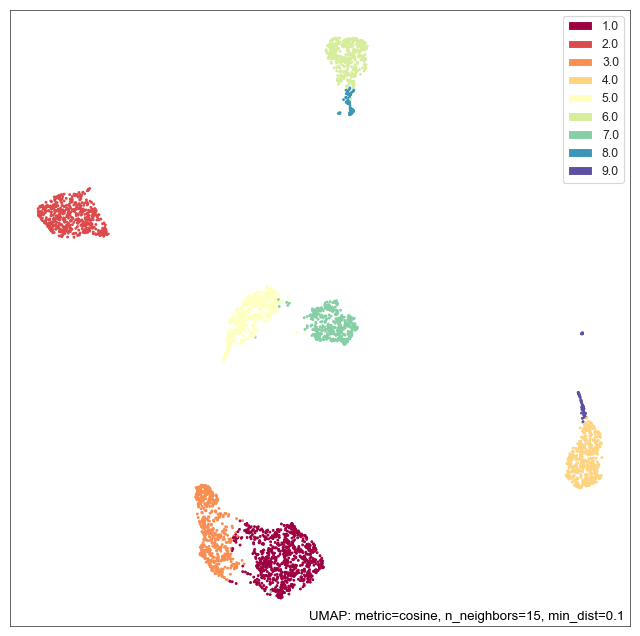

In [57]:
umap.plot.points(mapper, labels=clustering)

# scanpy와 호환성

In [58]:
adata.obsm['PCA_scLENS'] = adata.obsm['PCA_scLENS'].get()
sc.pp.neighbors(adata, use_rep='PCA_scLENS')

In [59]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot', 'neighbors'
    obsm: 'PCA_scLENS'
    obsp: 'distances', 'connectivities'

In [60]:
sc.tl.umap(adata)

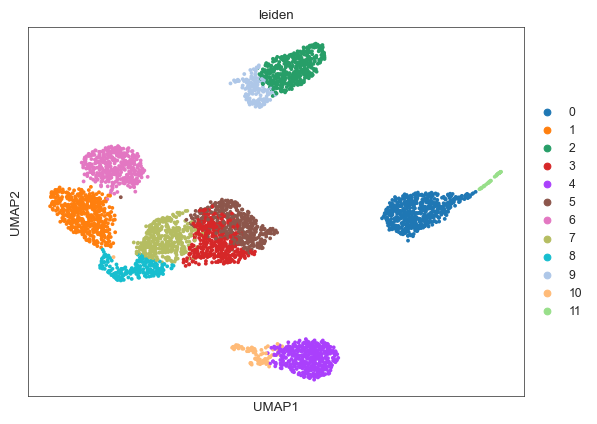

In [61]:
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color='leiden')

In [62]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell', 'leiden'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'PCA_scLENS', 'X_umap'
    obsp: 'distances', 'connectivities'